In [80]:
import pickle

data = {
    "Undefend": pickle.load(open("run/test/20240316ourbaseow/ours/DF/undefend/undefend.pkl", "rb")),
    "RegularTor": pickle.load(
        open("run/test/20240316ourbaseow/ours/DF/regulartor/regulartor.pkl", "rb")
    ),
    "Tamaraw": pickle.load(open("run/test/20240316ourbaseow/ours/DF/tamaraw/tamaraw.pkl", "rb")),
    "Ours-GF": pickle.load(open("run/test/heyiow/ours/DF/front1gan9/front1gan9.pkl", "rb")),
    # "Interspace":pickle.load(open('run/test/20240316ourbaseow/ours/DF/interspace/interspace.pkl', 'rb')),
    "Front": pickle.load(open("run/test/20240316ourbaseow/ours/DF/front/front.pkl", "rb")),
    "Surakav": pickle.load(open("run/test/20240316ourbaseow/ours/DF/wfgan/wfgan.pkl", "rb")),
    "Ours-RD": pickle.load(
        open("run/test/20240316ourbaseow/ours/DF/switch_all/switch_all.pkl", "rb")
    ),
    "Ours-Priv": pickle.load(
        open(
            "run/test/20240316ourbaseow/ours/RF/undefend&front&tamaraw&wfgan&regulartor/ezlinear.pkl",
            "rb",
        )
    ),
}

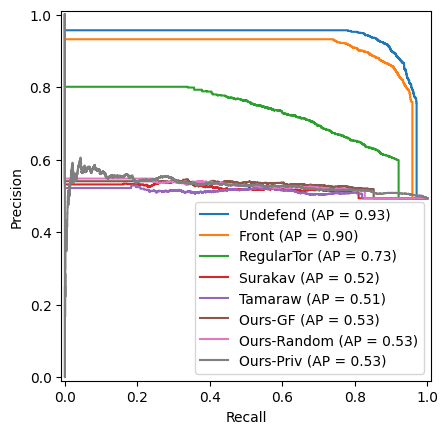

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots()
for name, y in data.items():
    y_true = y["y_true"][:, 0]
    y_pred = y["y_pred"]
    # softmax y_pred
    y_pred = np.exp(y_pred) / np.sum(np.exp(y_pred), axis=1)[:, np.newaxis]
    y_pred = y_pred[:, 0]
    PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax, name=name)

    p, r, _ = precision_recall_curve(y_true, y_pred)
plt.legend(loc="lower right")
plt.ylabel("Precision")
plt.xlabel("Recall")
# plt.show()
plt.savefig("pr_curve.pdf")

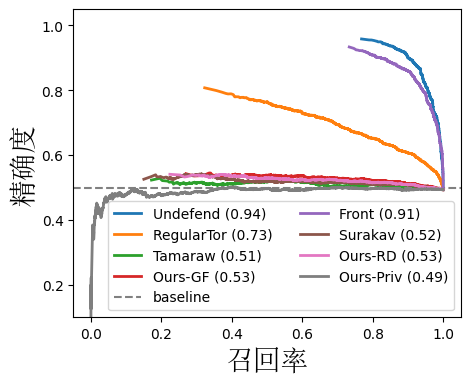

In [82]:
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np

fig, ax = plt.subplots(figsize=(5, 4))

for name, y in data.items():
    y_true = y["y_true"][:, 0]
    y_pred = y["y_pred"][:, 0]
    precision, recall, thersholds = precision_recall_curve(
        y_true, y_pred
    )  # pos_label指定哪个标签为正样本
    precision = precision[:-1]
    recall = recall[:-1]
    # slice_ = np.where((precision > 0.4) & (recall < 0.95) & (recall > 0.0))
    # precision = precision[slice_]
    # recall = recall[slice_]
    l = precision.shape[0]

    step = l // 11
    start = 0
    # if step > 1:
    #     precision = precision[np.arange(start, start + step * 10 + 1, step)]
    #     recall = recall[np.arange(start, start + step * 10 + 1, step)]
    area = average_precision_score(y_true, y_pred)  # 计算PR曲线下面积

    plt.plot(
        recall,
        precision,
        "-",
        label=f"{name} ({area:.2f})",
        lw=2,
        # marker=".",
    )
    if "GF" in name:
        plt.axhline(y=0.5, color="grey", linestyle="--", label="baseline")
plt.xlim([-0.05, 1.05])
plt.ylim([0.1, 1.05])
plt.xlabel("召回率", fontproperties="Simsun", fontsize=20)
plt.ylabel("精确度", fontproperties="Simsun", fontsize=20)
# plt.title("PR Curve")

plt.legend(loc="lower right", ncol=2, fontsize=10)

# plt.show()
plt.savefig("fig/c4-pr-curve-df.pdf", bbox_inches="tight", dpi=10)